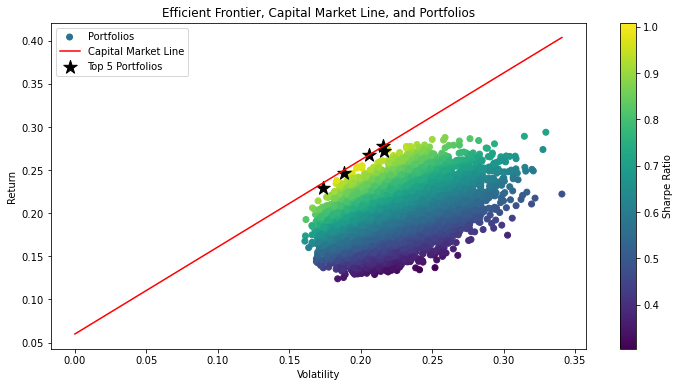

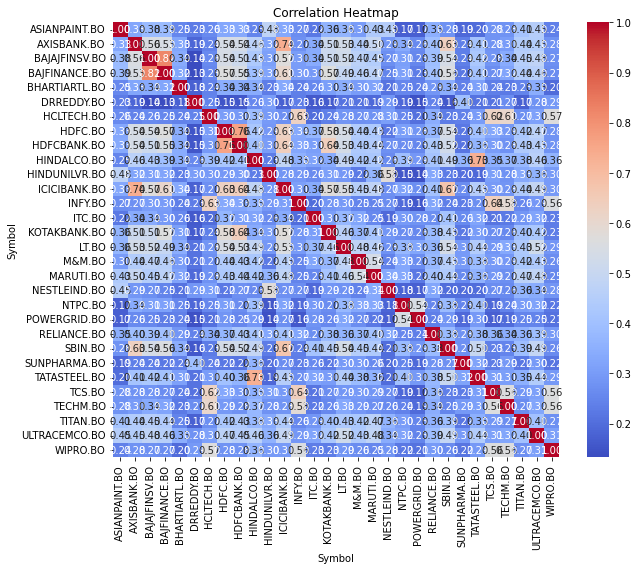

,Return,Volatility,Sharpe Ratio,Symbols,Weights
7479,0.277707,0.215845,1.008627,"[KOTAKBANK.BO, HINDALCO.BO, BHARTIARTL.BO, TIT...","[0.009364162323172045, 0.038162422104563255, 0..."
9776,0.267382,0.205745,1.007957,"[HCLTECH.BO, ASIANPAINT.BO, TITAN.BO, ICICIBAN...","[0.16493639767884957, 0.2555514033648598, 0.38..."
3853,0.246118,0.188538,0.987162,"[SUNPHARMA.BO, INFY.BO, TITAN.BO, BHARTIARTL.B...","[0.0436774694724376, 0.08028568560966248, 0.27..."
9110,0.272363,0.216639,0.980262,"[TITAN.BO, ASIANPAINT.BO, BAJFINANCE.BO, HCLTE...","[0.38151271313905083, 0.11007058626033007, 0.1..."
4983,0.229820,0.173981,0.976080,"[DRREDDY.BO, INFY.BO, POWERGRID.BO, NESTLEIND....","[0.20820632469177017, 0.0798879479501897, 0.14..."


In [14]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from datetime import datetime, timedelta

    # Load the data
    file_path = r"master_data.csv"
    data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

    # Calculate daily returns for each stock
    daily_returns = data.pivot(columns='Symbol', values='Adj Close').pct_change()
    daily_returns = daily_returns.dropna()

    # Define constants
    INVESTMENT = 1e7  # INR 1 Crore
    MAX_WEIGHT = 0.3  # Maximum exposure in a single stock
    NUM_STOCKS = 5    # Number of stocks in the portfolio
    RISK_FREE_RATE = 0.06  # Assuming a risk-free rate of 6%

    # Function to generate random portfolios
    def generate_random_portfolios(num_portfolios: int) -> pd.DataFrame:
        portfolio_returns = []
        portfolio_volatilities = []
        portfolio_weights = []
        portfolio_symbols = []

        for _ in range(num_portfolios):
            selected_stocks = np.random.choice(daily_returns.columns, NUM_STOCKS, replace=False)
            weights = np.random.random(NUM_STOCKS)
            weights /= np.sum(weights)
            annualized_return = np.sum(daily_returns[selected_stocks].mean() * weights) * 252
            annualized_volatility = np.sqrt(np.dot(weights.T, np.dot(daily_returns[selected_stocks].cov() * 252, weights)))
            portfolio_returns.append(annualized_return)
            portfolio_volatilities.append(annualized_volatility)
            portfolio_weights.append(weights)
            portfolio_symbols.append(selected_stocks)

        portfolios = pd.DataFrame({
            'Return': portfolio_returns,
            'Volatility': portfolio_volatilities,
            'Weights': portfolio_weights,
            'Symbols': portfolio_symbols
        })
        portfolios['Sharpe Ratio'] = (portfolios['Return'] - RISK_FREE_RATE) / portfolios['Volatility']

        return portfolios

    # Generate random portfolios
    num_portfolios = 10000
    portfolios = generate_random_portfolios(num_portfolios)

    # Plot Efficient Frontier, Capital Market Line, and Scatter Plot of Portfolios
    plt.figure(figsize=(12, 6))
    plt.scatter(portfolios['Volatility'], portfolios['Return'], c=portfolios['Sharpe Ratio'], cmap='viridis', label='Portfolios')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.title('Efficient Frontier, Capital Market Line, and Portfolios')

    # Capital Market Line
    slope = (portfolios['Return'] - RISK_FREE_RATE) / portfolios['Volatility']
    CML_x = np.linspace(0, max(portfolios['Volatility']), 200)
    CML_y = RISK_FREE_RATE + slope.max() * CML_x
    plt.plot(CML_x, CML_y, color='red', label='Capital Market Line')

    # Highlight the top 5 most profitable portfolios based on Sharpe Ratio
    top_portfolios = portfolios.sort_values(by='Sharpe Ratio', ascending=False).head(5)
    plt.scatter(top_portfolios['Volatility'], top_portfolios['Return'], c='black', marker='*', s=200, label='Top 5 Portfolios')

    plt.legend()
    plt.show()

    # Correlation Heatmap
    correlation_matrix = daily_returns.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

    # Display the top 5 most profitable portfolios based on Sharpe Ratio
    top_portfolios[['Return', 'Volatility', 'Sharpe Ratio', 'Symbols', 'Weights']]
